 Proyek Akhir Image Classification Model Deployment pada pembelajar Pengembangan Machine Learning. <br>
 Nama : Ahmad Wandi <br>
 Tanggal : 14 Januari 2024

In [7]:
!pip install kaggle

## Import Semua Module

In [47]:
from google.colab import files
import matplotlib.pyplot as plt
import PIL
import zipfile, os, pathlib
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, EarlyStopping

Apload File Api Key Kaggle

In [ ]:
files.upload()

Membuat dan memasukan Api key Kaggle kedalam Folder

In [10]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

Melakukan Install Dataset dari Api dataset

In [11]:
!kaggle datasets download -d misrakahmed/vegetable-image-dataset

100% 533M/534M [00:08<00:00, 90.9MB/s]
100% 534M/534M [00:08<00:00, 69.8MB/s]


## Exploratory Dataset

In [59]:
zip_ref = zipfile.ZipFile('/content/vegetable-image-dataset.zip', 'r')
zip_ref.extractall('/content/sets')
zip_ref.close()

In [60]:
folder_path = '/content/sets/Vegetable Images/train'

folder_names = os.listdir(folder_path)
for folder_name in folder_names:
    print('folder',folder_name)
total_file = len(os.listdir(folder_path))
print ('Total Folder : ',total_file)

folder Broccoli
folder Cauliflower
folder Capsicum
folder Cabbage
folder Bitter_Gourd
folder Radish
folder Cucumber
folder Bean
folder Carrot
folder Bottle_Gourd
folder Pumpkin
folder Potato
folder Papaya
folder Tomato
folder Brinjal
Total Folder :  15


In [61]:
file_count = 0
for root, dirs, files in os.walk(folder_path):
    for file in files:
        file_count += 1


print('Total Dataset Adalah: ',file_count)


Total Dataset Adalah:  15000


In [62]:
def count_files(rootdir):
    for dirpath, _, filenames in os.walk(rootdir):
        file_count = sum(1 for file in filenames if os.path.isfile(os.path.join(dirpath, file)))
        if file_count > 0:
            print(f"Terdapat {file_count} Dataset dari Folder {os.path.basename(dirpath)}")

count_files(folder_path)

Terdapat 1000 Dataset dari Folder Broccoli
Terdapat 1000 Dataset dari Folder Cauliflower
Terdapat 1000 Dataset dari Folder Capsicum
Terdapat 1000 Dataset dari Folder Cabbage
Terdapat 1000 Dataset dari Folder Bitter_Gourd
Terdapat 1000 Dataset dari Folder Radish
Terdapat 1000 Dataset dari Folder Cucumber
Terdapat 1000 Dataset dari Folder Bean
Terdapat 1000 Dataset dari Folder Carrot
Terdapat 1000 Dataset dari Folder Bottle_Gourd
Terdapat 1000 Dataset dari Folder Pumpkin
Terdapat 1000 Dataset dari Folder Potato
Terdapat 1000 Dataset dari Folder Papaya
Terdapat 1000 Dataset dari Folder Tomato
Terdapat 1000 Dataset dari Folder Brinjal


## Menampilkan Gambar dari 15 Folder yang ada

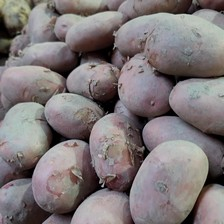

In [63]:
data_dir = pathlib.Path(folder_path).with_suffix('')

Potato = list(data_dir.glob('Potato/*.jpg'))
PIL.Image.open(Potato[1])

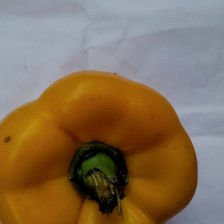

In [64]:
Capsicum = list(data_dir.glob('Capsicum/*.jpg'))
PIL.Image.open(Capsicum[1])

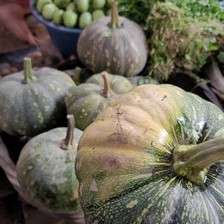

In [65]:
Pumpkin = list(data_dir.glob('Pumpkin/*.jpg'))
PIL.Image.open(Pumpkin[100])

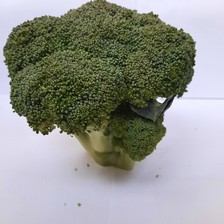

In [66]:
Broccoli = list(data_dir.glob('Broccoli/*.jpg'))
PIL.Image.open(Broccoli[1])

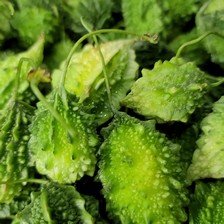

In [67]:
Bitter_Gourd = list(data_dir.glob('Bitter_Gourd/*.jpg'))
PIL.Image.open(Bitter_Gourd[10])

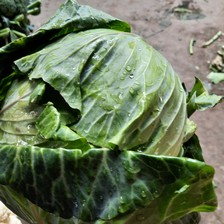

In [68]:
Cabbage = list(data_dir.glob('Cabbage/*.jpg'))
PIL.Image.open(Cabbage[10])

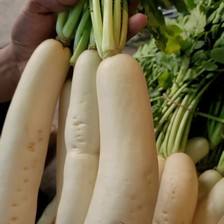

In [69]:
Radish = list(data_dir.glob('Radish/*.jpg'))
PIL.Image.open(Radish[10])

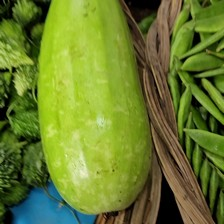

In [70]:
Bottle_Gourd = list(data_dir.glob('Bottle_Gourd/*.jpg'))
PIL.Image.open(Bottle_Gourd[10])

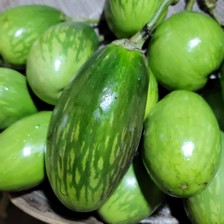

In [71]:
Brinjal = list(data_dir.glob('Brinjal/*.jpg'))
PIL.Image.open(Brinjal[10])

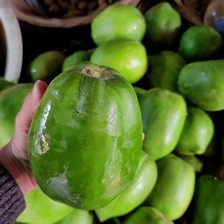

In [72]:
Papaya = list(data_dir.glob('Papaya/*.jpg'))
PIL.Image.open(Papaya[200])

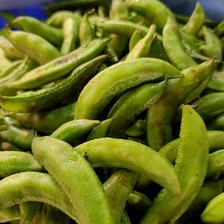

In [73]:
Bean = list(data_dir.glob('Bean/*.jpg'))
PIL.Image.open(Bean[10])

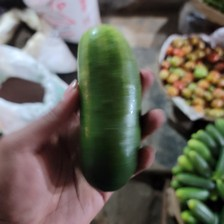

In [74]:
Cucumber = list(data_dir.glob('Cucumber/*.jpg'))
PIL.Image.open(Cucumber[10])

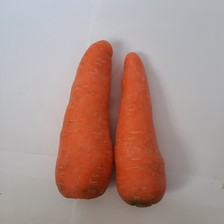

In [75]:
Carrot = list(data_dir.glob('Carrot/*.jpg'))
PIL.Image.open(Carrot[10])

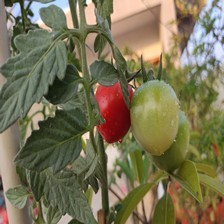

In [76]:
Tomato = list(data_dir.glob('Tomato/*.jpg'))
PIL.Image.open(Tomato[120])

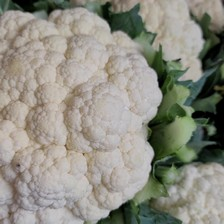

In [77]:
Cauliflower = list(data_dir.glob('Cauliflower/*.jpg'))
PIL.Image.open(Cauliflower[10])

## Image Data Generator

In [78]:
val_size = 0.2

train_datagen = ImageDataGenerator(
    rotation_range = 20,
    brightness_range = [0.5,1.5],
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
    vertical_flip=True,
    rescale = 1./255,
    validation_split = val_size
)

validation_datagen = ImageDataGenerator(
    rotation_range = 20,
    brightness_range = [0.5,1.5],
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip=True,
    fill_mode = "nearest",
    rescale = 1./255,
    validation_split = val_size
)

In [79]:
train_generator = train_datagen.flow_from_directory(
    folder_path,
    target_size = (150,150),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 128,
    shuffle = True,
    subset = "training"
)

validation_generator = validation_datagen.flow_from_directory(
    folder_path,
    target_size = (150,150),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 128,
    shuffle = False,
    subset = "validation"
)

Found 12000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


## Membuat model

In [80]:
model = Sequential([
       tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)),
       tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
       tf.keras.layers.Dropout(0.2),
       tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
       tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(512, activation='relu'),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Dense(128, activation='relu'),
       tf.keras.layers.Dropout(0.25),
       tf.keras.layers.Dense(15, activation='softmax')



])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 87616)            

In [81]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Menetapkan Callback

In [82]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.95 and logs.get('val_accuracy') >= 0.95 ):
      print("\n Accuracy dan Validation Accuracy sudah mencapai 95 % atau lebih")
      self.model.stop_training = True
callbacks = myCallback()


##Melatih Model

In [83]:
history = model.fit(train_generator,
                 epochs=50,
                 verbose=1,
                 validation_data= validation_generator,
                 callbacks=callbacks,
                 workers=4
                )

Epoch 1/50
94/94 [==============================] - 149s 2s/step - loss: 1.9882 - accuracy: 0.3567 - val_loss: 2.0869 - val_accuracy: 0.3100
Epoch 2/50
94/94 [==============================] - 147s 2s/step - loss: 1.1704 - accuracy: 0.6025 - val_loss: 1.6308 - val_accuracy: 0.4177
Epoch 3/50
94/94 [==============================] - 145s 2s/step - loss: 0.9445 - accuracy: 0.6877 - val_loss: 2.1322 - val_accuracy: 0.3537
Epoch 4/50
94/94 [==============================] - 150s 2s/step - loss: 0.7561 - accuracy: 0.7435 - val_loss: 3.3031 - val_accuracy: 0.3037
Epoch 5/50
94/94 [==============================] - 147s 2s/step - loss: 0.6432 - accuracy: 0.7848 - val_loss: 1.5392 - val_accuracy: 0.5037
Epoch 6/50
94/94 [==============================] - 146s 2s/step - loss: 0.5369 - accuracy: 0.8219 - val_loss: 2.9268 - val_accuracy: 0.3920
Epoch 7/50
94/94 [==============================] - 148s 2s/step - loss: 0.4852 - accuracy: 0.8362 - val_loss: 0.9942 - val_accuracy: 0.6943
Epoch 8/50
94

## Membuat plot terhadap akurasi dan loss model

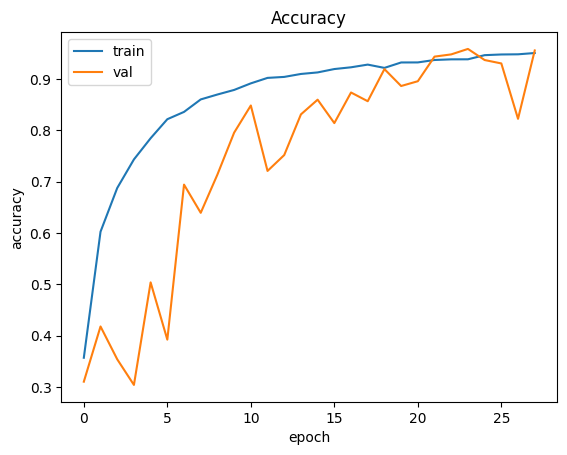

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

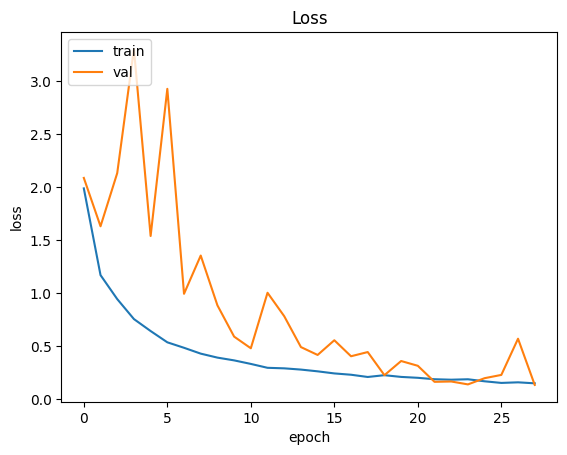

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Menyimpan model ke dalam format TF-Lite.

In [89]:
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('Vegetables.tflite')
tflite_model_file.write_bytes(tflite_model)

179791780